In [ ]:
#import libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix


In [ ]:
#downloading dataset

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 174MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


In [11]:
import pandas as pd

fake = pd.read_csv(f"{path}/Fake.csv")
true = pd.read_csv(f"{path}/True.csv")

print("Fake news shape:", fake.shape)
print("True news shape:", true.shape)

fake.head()

Fake news shape: (23481, 4)
True news shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#combine and label data

In [12]:
fake['label']=0
true['label']=1

df= pd.concat([fake , true] ,axis=0)
df= df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,Amnesty International urges halt to Afghan ref...,KABUL (Reuters) - The human rights group Amnes...,worldnews,"October 5, 2017",1
1,Chris Wallace Just Shoved His Foot So Far Up ...,Donald Trump may spend his time furiously twee...,News,"May 12, 2017",0
2,Newly Leaked Executive Order Will Turn A FRIG...,It seems the Trump administration will stop at...,News,"February 2, 2017",0
3,Germany hopes for improvement in Turkey ties a...,BERLIN (Reuters) - German Foreign Minister Sig...,worldnews,"December 22, 2017",1
4,EU parliament's Brexit negotiator - 'Not so pe...,BERLIN (Reuters) - The European Union and Brit...,worldnews,"November 16, 2017",1


In [ ]:
#preprocessing

In [13]:
df["text"]=df["text"].str.lower()
df=df.dropna()
print("Dataset shape after cleaning:" , df.shape)

Dataset shape after cleaning: (44898, 5)


In [ ]:
#train-test-split

In [14]:
x=df["text"]
y= df["label"]
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)
print( "Training size:" , X_train.shape)
print("Testing size:" , X_test.shape)

Training size: (35918,)
Testing size: (8980,)


In [ ]:
#convert text into numbers

In [16]:
vectorizer= TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf= vectorizer.fit_transform(X_train)
X_test_tfidf= vectorizer.transform(X_test)

In [ ]:
#train the model

In [17]:
model= LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
y_pred= model.predict(X_test_tfidf)


Accuracy: 0.98
\InClassfication Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4662
           1       0.98      0.99      0.98      4318

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-1219444120.py:4: SyntaxWarning: invalid escape sequence '\I'
  print("\InClassfication Report:\n")


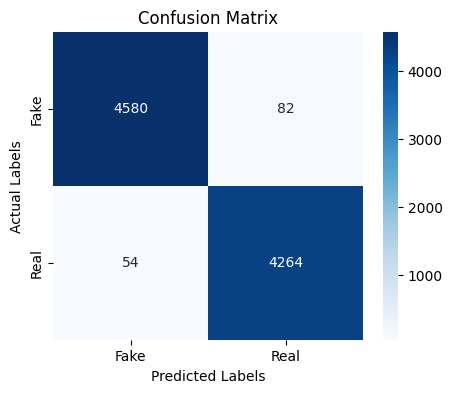

In [19]:
accuracy= accuracy_score(y_test , y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\InClassfication Report:\n")
print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test , y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm ,annot=True , fmt='d' , cmap='Blues' , xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title( 'Confusion Matrix')
plt.show()